In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 코랩에서 한글 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [22]:
# 한글 폰트 가져오기
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

In [3]:
data = pd.read_csv('/content/data.csv')

data.head()

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co
0,1,어린이집,이루숲어린이집,사립,강원도 춘천시 백석골길22번길 21-21 이루숲어린이집(퇴계동),131164,4236,17007,2020,11,1,28.186019,0
1,10,어린이집,창의나라어린이집,사립,강원 춘천시 석사동 893 현진에버빌 104-101,119519,3793,14986,2020,11,1,28.186019,0
2,100,어린이집,사랑어린이집,사립,강원도 춘천시 향교앞길 5 (교동),12371,163,2266,2020,11,1,28.186019,0
3,1000,어린이집,꼬마대통령어린이집,사립,"강원도 강릉시 토성로 39 107동 106호(홍제동, 홍제힐스테이트)",29106,714,6988,2020,11,1,28.186019,0
4,1001,어린이집,솔빛어린이집,사립,강원도 강릉시 성덕포남로200번길 3 (포남동),79212,1715,11545,2020,11,1,28.186019,0


In [4]:
pd.isnull(data)

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130280,False,False,False,False,False,False,False,False,False,False,False,False,False
130281,False,False,False,False,False,False,False,False,False,False,False,False,False
130282,False,False,False,False,False,False,False,False,False,False,False,False,False
130283,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
def extract_location(address):
    parts = address.split()
    if len(parts) > 1:
        return f"{parts[0]} {parts[1]}"
    else:
        return address

In [7]:
data['location'] = data['rn_addr'].apply(extract_location)

data.head()

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,location
0,1,어린이집,이루숲어린이집,사립,강원도 춘천시 백석골길22번길 21-21 이루숲어린이집(퇴계동),131164,4236,17007,2020,11,1,28.186019,0,강원도 춘천시
1,10,어린이집,창의나라어린이집,사립,강원 춘천시 석사동 893 현진에버빌 104-101,119519,3793,14986,2020,11,1,28.186019,0,강원 춘천시
2,100,어린이집,사랑어린이집,사립,강원도 춘천시 향교앞길 5 (교동),12371,163,2266,2020,11,1,28.186019,0,강원도 춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,"강원도 강릉시 토성로 39 107동 106호(홍제동, 홍제힐스테이트)",29106,714,6988,2020,11,1,28.186019,0,강원도 강릉시
4,1001,어린이집,솔빛어린이집,사립,강원도 강릉시 성덕포남로200번길 3 (포남동),79212,1715,11545,2020,11,1,28.186019,0,강원도 강릉시


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52632 (\N{HANGUL SYLLABLE CUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.p

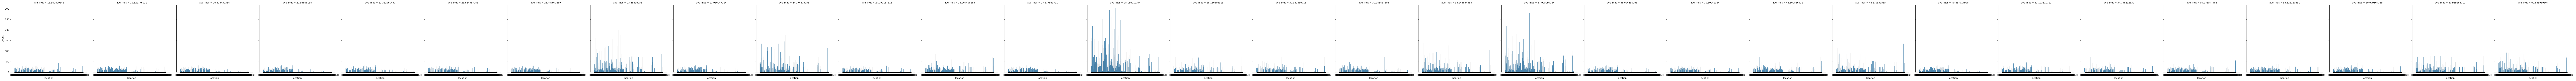

In [8]:
sns.displot(data=data, x='location', col='ave_fnds')
plt.show()

In [10]:
data_filtered_data = data.loc[(data['examin_mt'] == 11) & (data['examin_dt'] == 1)]

data_filtered_data.head()

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,location
0,1,어린이집,이루숲어린이집,사립,강원도 춘천시 백석골길22번길 21-21 이루숲어린이집(퇴계동),131164,4236,17007,2020,11,1,28.186019,0,강원도 춘천시
1,10,어린이집,창의나라어린이집,사립,강원 춘천시 석사동 893 현진에버빌 104-101,119519,3793,14986,2020,11,1,28.186019,0,강원 춘천시
2,100,어린이집,사랑어린이집,사립,강원도 춘천시 향교앞길 5 (교동),12371,163,2266,2020,11,1,28.186019,0,강원도 춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,"강원도 강릉시 토성로 39 107동 106호(홍제동, 홍제힐스테이트)",29106,714,6988,2020,11,1,28.186019,0,강원도 강릉시
4,1001,어린이집,솔빛어린이집,사립,강원도 강릉시 성덕포남로200번길 3 (포남동),79212,1715,11545,2020,11,1,28.186019,0,강원도 강릉시


In [12]:
data_filtered_data.count()

esntl_no                 16522
elsm_nm                  16522
schl_nm                  16522
fdtn_sctn_dscnt          16522
rn_addr                  16522
tot_po                   16522
ten_und_po               16522
hshld_co                 16522
examin_yr                16522
examin_mt                16522
examin_dt                16522
ave_fnds                 16522
qltwtr_poll_entrps_co    16522
location                 16522
dtype: int64

In [13]:
data_filtered_data['location'] = data_filtered_data['location'].str.replace('^강원 ', '강원도 ', regex=True)

data_filtered_data.head()

<ipython-input-13-c8259b6a4899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_data['location'] = data_filtered_data['location'].str.replace('^강원 ', '강원도 ', regex=True)


,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,location
0,1,어린이집,이루숲어린이집,사립,강원도 춘천시 백석골길22번길 21-21 이루숲어린이집(퇴계동),131164,4236,17007,2020,11,1,28.186019,0,강원도 춘천시
1,10,어린이집,창의나라어린이집,사립,강원 춘천시 석사동 893 현진에버빌 104-101,119519,3793,14986,2020,11,1,28.186019,0,강원도 춘천시
2,100,어린이집,사랑어린이집,사립,강원도 춘천시 향교앞길 5 (교동),12371,163,2266,2020,11,1,28.186019,0,강원도 춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,"강원도 강릉시 토성로 39 107동 106호(홍제동, 홍제힐스테이트)",29106,714,6988,2020,11,1,28.186019,0,강원도 강릉시
4,1001,어린이집,솔빛어린이집,사립,강원도 강릉시 성덕포남로200번길 3 (포남동),79212,1715,11545,2020,11,1,28.186019,0,강원도 강릉시


In [17]:
data_filtered_data['location'] = data_filtered_data['location'].str.replace('^경기 ', '경기도 ', regex=True)

data_filtered_data.head()

<ipython-input-17-62b7c2524acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_data['location'] = data_filtered_data['location'].str.replace('^경기 ', '경기도 ', regex=True)


,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,location
0,1,어린이집,이루숲어린이집,사립,강원도 춘천시 백석골길22번길 21-21 이루숲어린이집(퇴계동),131164,4236,17007,2020,11,1,28.186019,0,강원도 춘천시
1,10,어린이집,창의나라어린이집,사립,강원 춘천시 석사동 893 현진에버빌 104-101,119519,3793,14986,2020,11,1,28.186019,0,강원도 춘천시
2,100,어린이집,사랑어린이집,사립,강원도 춘천시 향교앞길 5 (교동),12371,163,2266,2020,11,1,28.186019,0,강원도 춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,"강원도 강릉시 토성로 39 107동 106호(홍제동, 홍제힐스테이트)",29106,714,6988,2020,11,1,28.186019,0,강원도 강릉시
4,1001,어린이집,솔빛어린이집,사립,강원도 강릉시 성덕포남로200번길 3 (포남동),79212,1715,11545,2020,11,1,28.186019,0,강원도 강릉시


In [18]:
group_data = data_filtered_data.groupby('location')

In [19]:
group_data.count()

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co
location,,,,,,,,,,,,,
강원도 강릉시,136,136,136,136,136,136,136,136,136,136,136,136,136
강원도 고성군,24,24,24,24,24,24,24,24,24,24,24,24,24
강원도 동해시,56,56,56,56,56,56,56,56,56,56,56,56,56
강원도 삼척시,44,44,44,44,44,44,44,44,44,44,44,44,44
강원도 속초시,43,43,43,43,43,43,43,43,43,43,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 증평군,30,30,30,30,30,30,30,30,30,30,30,30,30
충청북도 진천군,50,50,50,50,50,50,50,50,50,50,50,50,50
충청북도 청원군,5,5,5,5,5,5,5,5,5,5,5,5,5


In [5]:
filtered_data = pd.read_csv('/content/child-env-data-preprocessed.csv')

filtered_data.head()

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,tot_po,ten_und_po,hshld_co,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,addr_1,addr_2
0,1,어린이집,이루숲어린이집,사립,131164,4236,17007,11,1,28.186019,0,강원도,춘천시
1,10,어린이집,창의나라어린이집,사립,119519,3793,14986,11,1,28.186019,0,강원도,춘천시
2,100,어린이집,사랑어린이집,사립,12371,163,2266,11,1,28.186019,0,강원도,춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,29106,714,6988,11,1,28.186019,0,강원도,강릉시
4,1001,어린이집,솔빛어린이집,사립,79212,1715,11545,11,1,28.186019,0,강원도,강릉시


In [10]:
group_data_city = filtered_data.groupby('addr_2')

print(group_data_city.count())
group_data_city.head()

        esntl_no  elsm_nm  schl_nm  fdtn_sctn_dscnt  tot_po  ten_und_po  \
addr_2                                                                    
가온로            1        1        1                1       1           1   
가평군           52       52       52               52      52          52   
갈매로            6        6        6                6       6           6   
강남구           42       42       42               42      42          42   
강동구           27       27       27               27      27          27   
...          ...      ...      ...              ...     ...         ...   
홍천군           74       74       74               74      74          74   
화성시          295      295      295              295     295         295   
화순군           54       54       54               54      54          54   
화천군           40       40       40               40      40          40   
횡성군           44       44       44               44      44          44   

        hshld_co  examin

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,tot_po,ten_und_po,hshld_co,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,addr_1,addr_2
0,1,어린이집,이루숲어린이집,사립,131164,4236,17007,11,1,28.186019,0,강원도,춘천시
1,10,어린이집,창의나라어린이집,사립,119519,3793,14986,11,1,28.186019,0,강원도,춘천시
2,100,어린이집,사랑어린이집,사립,12371,163,2266,11,1,28.186019,0,강원도,춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,29106,714,6988,11,1,28.186019,0,강원도,강릉시
4,1001,어린이집,솔빛어린이집,사립,79212,1715,11545,11,1,28.186019,0,강원도,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16348,8153,유치원,만안유치원,사립,118116,3364,15182,11,1,28.186019,54,경기도,안양시
16349,8155,유치원,미림유치원,사립,281541,8681,32641,11,1,28.186019,1,경기도,안양시
16350,8160,유치원,샤론유치원,사립,550200,13659,75756,11,1,28.186019,2,경기도,안양시
16351,8164,유치원,성원유치원,사립,550200,13659,75756,11,1,28.186019,45,경기도,안양시


In [9]:
group_data = filtered_data.groupby('addr_1')

print(group_data.count())
group_data.head()

         esntl_no  elsm_nm  schl_nm  fdtn_sctn_dscnt  tot_po  ten_und_po  \
addr_1                                                                     
강원도          1039     1039     1039             1039    1039        1039   
경기도          3808     3808     3808             3808    3808        3808   
경상남도         1967     1967     1967             1967    1967        1967   
경상북도         1735     1735     1735             1735    1735        1735   
광주광역시         274      274      274              274     274         274   
대구광역시         436      436      436              436     436         436   
대전광역시         311      311      311              311     311         311   
부산광역시         613      613      613              613     613         613   
서울특별시         541      541      541              541     541         541   
세종특별자치시       124      124      124              124     124         124   
울산광역시         384      384      384              384     384         384   
인천광역시       

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,tot_po,ten_und_po,hshld_co,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co,addr_1,addr_2
0,1,어린이집,이루숲어린이집,사립,131164,4236,17007,11,1,28.186019,0,강원도,춘천시
1,10,어린이집,창의나라어린이집,사립,119519,3793,14986,11,1,28.186019,0,강원도,춘천시
2,100,어린이집,사랑어린이집,사립,12371,163,2266,11,1,28.186019,0,강원도,춘천시
3,1000,어린이집,꼬마대통령어린이집,사립,29106,714,6988,11,1,28.186019,0,강원도,강릉시
4,1001,어린이집,솔빛어린이집,사립,79212,1715,11545,11,1,28.186019,0,강원도,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11840,44169,어린이집,성연어린이집,사립,58106,1326,7025,11,1,28.186019,1,울산광역시,중구
11841,44170,어린이집,무지개어린이집,사립,64867,2495,8443,11,1,28.186019,3,울산광역시,중구
11842,44171,어린이집,열린교실어린이집,사립,58106,1326,7025,11,1,28.186019,1,울산광역시,중구
11843,44172,어린이집,영광예능어린이집,사립,64742,2833,8091,11,1,28.186019,3,울산광역시,중구


In [13]:
group_data

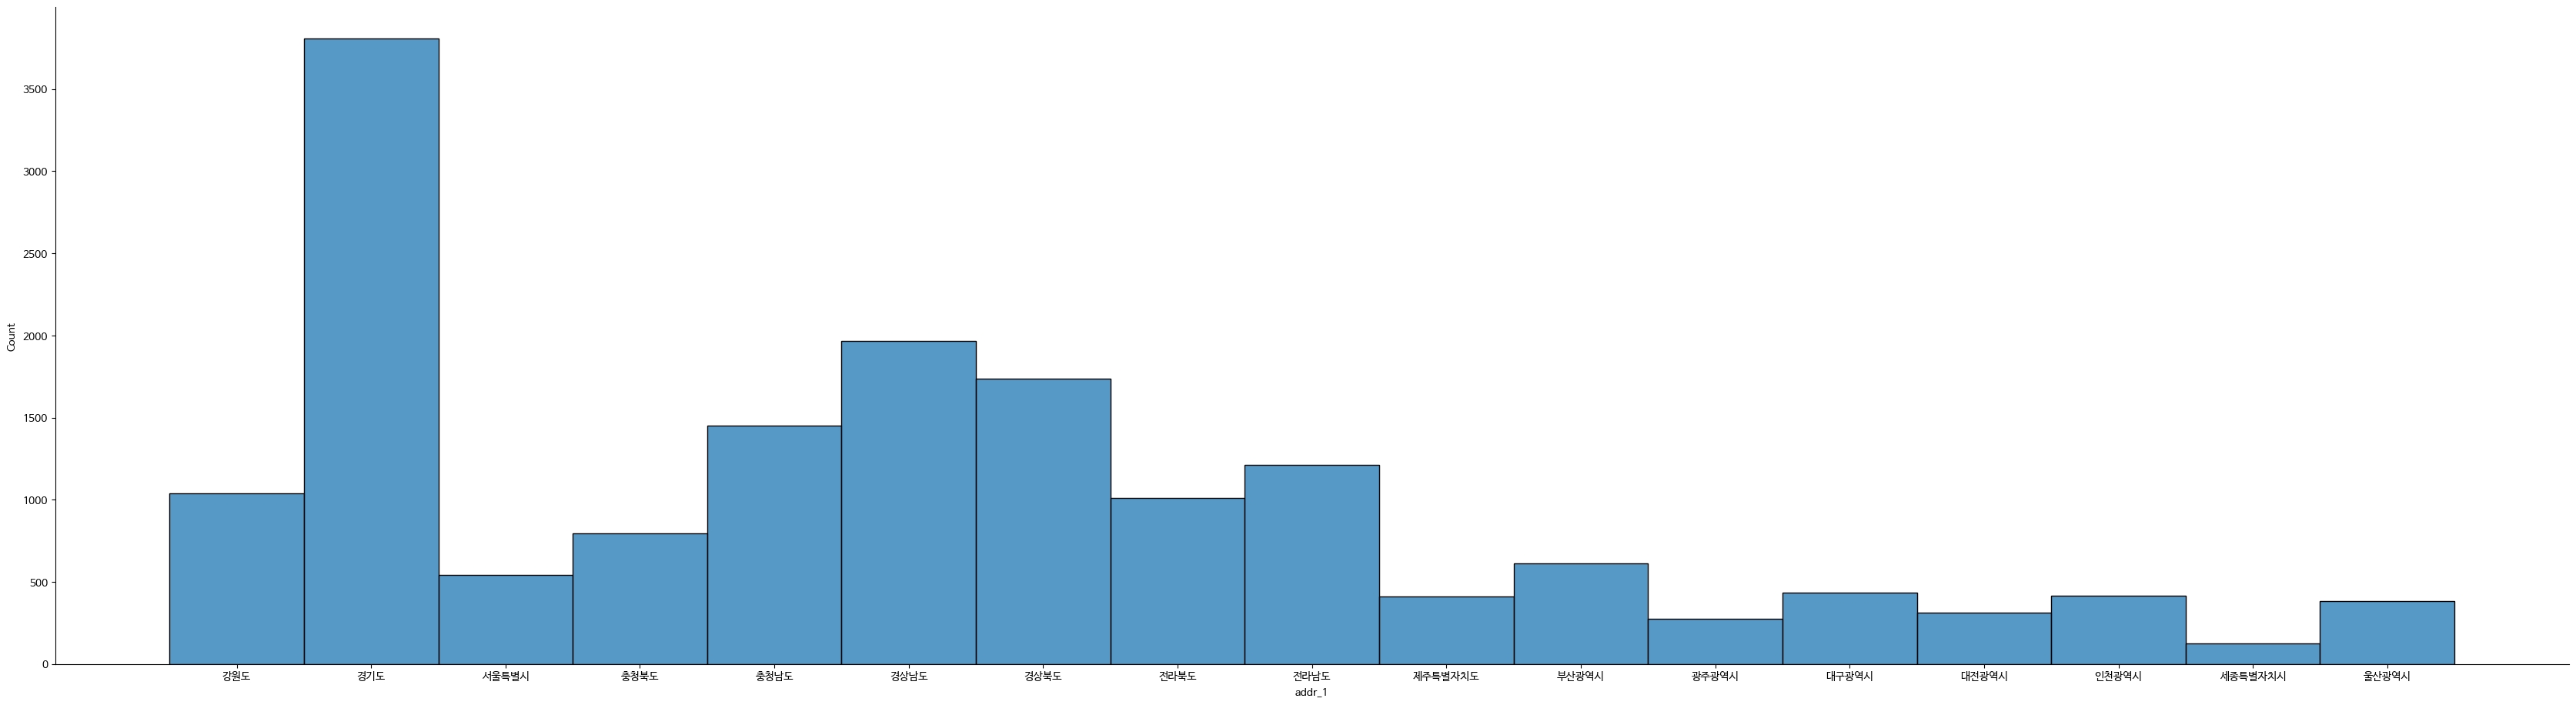

In [26]:
sns.displot(data=filtered_data, x='addr_1')
fig = plt.gcf()
fig.set_size_inches(40,10)
plt.show()

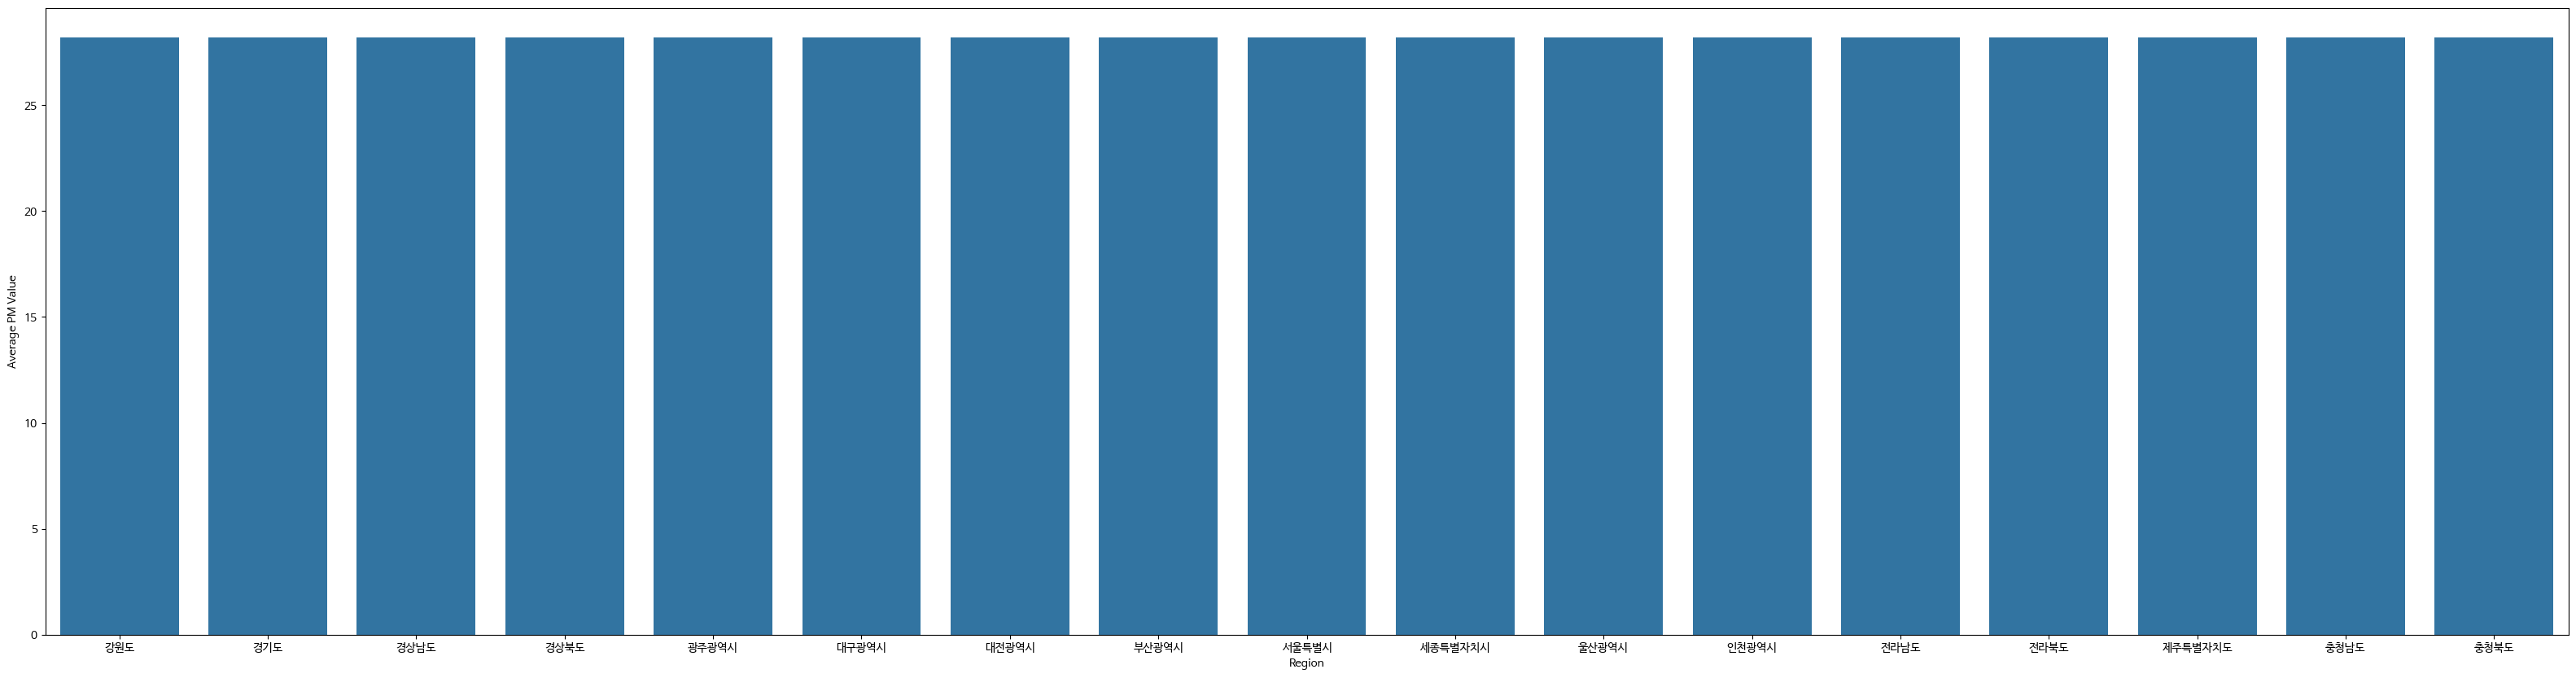

In [28]:
new_data = filtered_data.groupby('addr_1')['ave_fnds'].mean().reset_index()

# Seaborn을 사용하여 시각화
sns.barplot(x='addr_1', y='ave_fnds', data=new_data)
plt.xlabel('Region')
plt.ylabel('Average PM Value')
fig = plt.gcf()
fig.set_size_inches(40,10)
plt.show()

In [29]:
data = pd.read_csv('/content/data.csv')

date_filterd = data.loc[data['examin_mt'] == 11]

In [30]:
date_filterd.head()

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co
0,1,어린이집,이루숲어린이집,사립,강원도 춘천시 백석골길22번길 21-21 이루숲어린이집(퇴계동),131164,4236,17007,2020,11,1,28.186019,0
1,10,어린이집,창의나라어린이집,사립,강원 춘천시 석사동 893 현진에버빌 104-101,119519,3793,14986,2020,11,1,28.186019,0
2,100,어린이집,사랑어린이집,사립,강원도 춘천시 향교앞길 5 (교동),12371,163,2266,2020,11,1,28.186019,0
3,1000,어린이집,꼬마대통령어린이집,사립,"강원도 강릉시 토성로 39 107동 106호(홍제동, 홍제힐스테이트)",29106,714,6988,2020,11,1,28.186019,0
4,1001,어린이집,솔빛어린이집,사립,강원도 강릉시 성덕포남로200번길 3 (포남동),79212,1715,11545,2020,11,1,28.186019,0


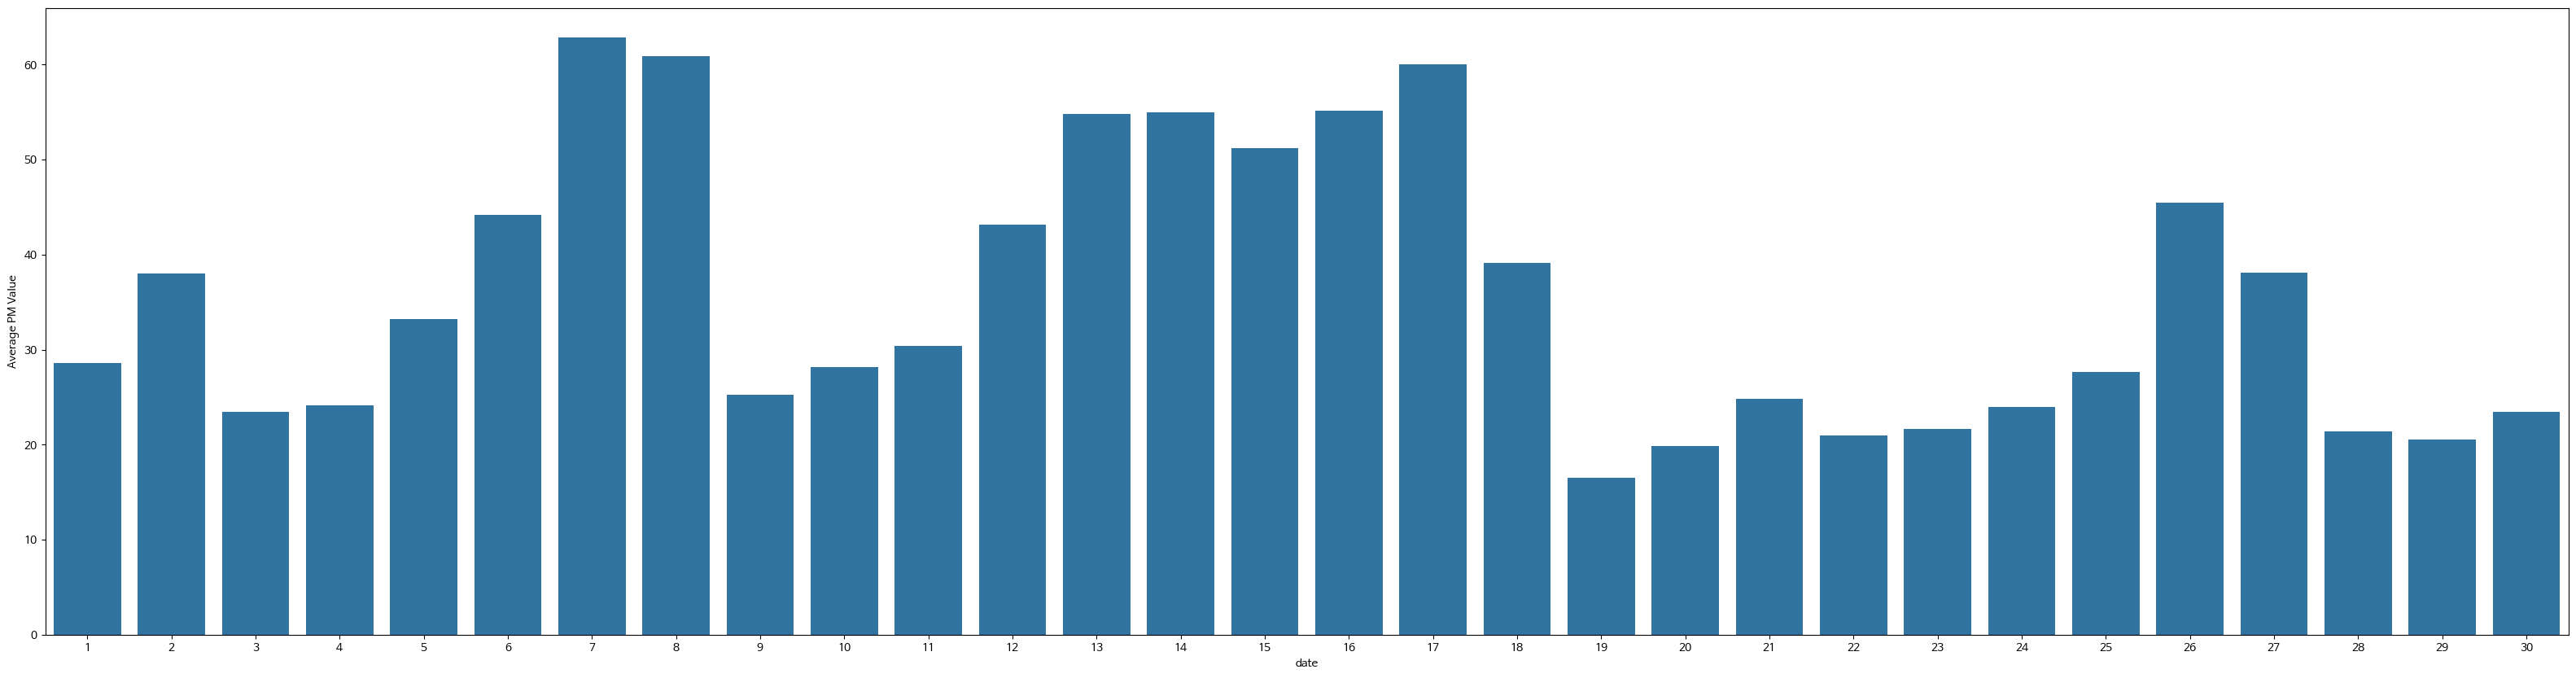

In [31]:
new_data = data.groupby('examin_dt')['ave_fnds'].mean().reset_index()

# Seaborn을 사용하여 시각화
sns.barplot(x='examin_dt', y='ave_fnds', data=new_data)
plt.xlabel('date')
plt.ylabel('Average PM Value')
fig = plt.gcf()
fig.set_size_inches(40,10)
plt.show()

In [33]:
data = pd.read_csv('/content/data.csv')

date_filterd = data.loc[(data['examin_mt'] == 11) & (data['examin_dt'] == 12)]

In [35]:
date_filterd

,esntl_no,elsm_nm,schl_nm,fdtn_sctn_dscnt,rn_addr,tot_po,ten_und_po,hshld_co,examin_yr,examin_mt,examin_dt,ave_fnds,qltwtr_poll_entrps_co
35,10083,유치원,율면초등학교병설유치원,공립,경기도 이천시 율면 고당로 48 (율면),9566,104,1468,2020,11,12,43.160886,0
72,10089,유치원,이천매곡초등학교병설유,공립,경기도 이천시 호법면 이섭대천로96번길 8 (호법면),17883,430,2695,2020,11,12,43.160886,0
144,10169,유치원,광선초등학교병설유치원,공립,경기도 안성시 죽산면 개좌길 16 . 광선초등학교 (죽산면. 광선초등학교),25560,359,3640,2020,11,12,43.160886,0
193,10186,유치원,서삼초등학교병설유치원,공립,경기도 안성시 보개면 보개원삼로 1001 . 서삼초등학교 (보개면),18277,259,2700,2020,11,12,43.160886,0
229,10190,유치원,양성초등학교병설유치원,공립,경기도 안성시 양성면 옥단길 43 (양성면. 양성초등학교),18357,243,2599,2020,11,12,43.160886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130142,9985,유치원,참조은유치원,사립,경기도 김포시 돌문로86번길 12-17 (사우동),63368,1754,9727,2020,11,12,43.160886,0
130171,999,어린이집,라온어린이집,사립,"강원도 강릉시 교동광장로 163 203동 101호(교동, 부영5차아파트)",112026,3169,14785,2020,11,12,43.160886,1
130203,9993,유치원,장기조은유치원,사립,경기도 김포시 김포한강2로 . 81번지 (장기동),104235,5124,15199,2020,11,12,43.160886,0
130227,9995,유치원,마송중앙초등학교병설유,공립,경기도 김포시 통진읍 마송1로 140 . 마송중앙초등학교 (통진읍),89482,2420,12943,2020,11,12,43.160886,0


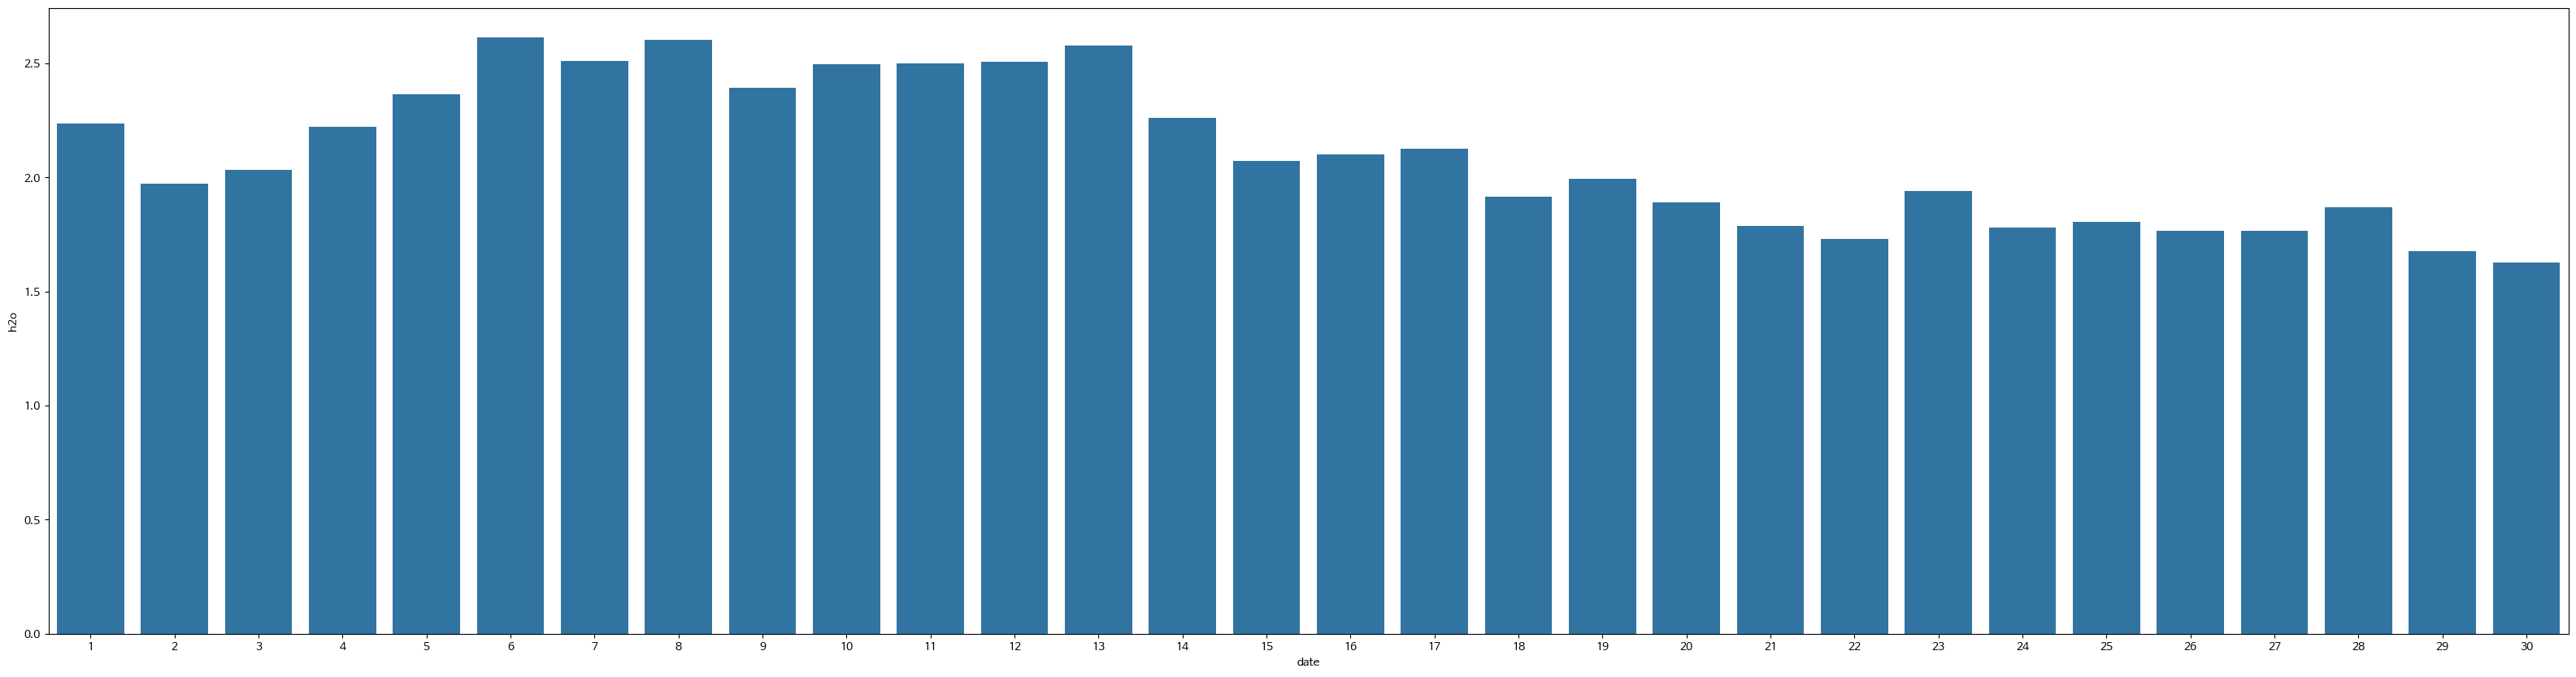

In [36]:
new_data = data.groupby('examin_dt')['qltwtr_poll_entrps_co'].mean().reset_index()

# Seaborn을 사용하여 시각화
sns.barplot(x='examin_dt', y='qltwtr_poll_entrps_co', data=new_data)
plt.xlabel('date')
plt.ylabel('h2o')
fig = plt.gcf()
fig.set_size_inches(40,10)
plt.show()

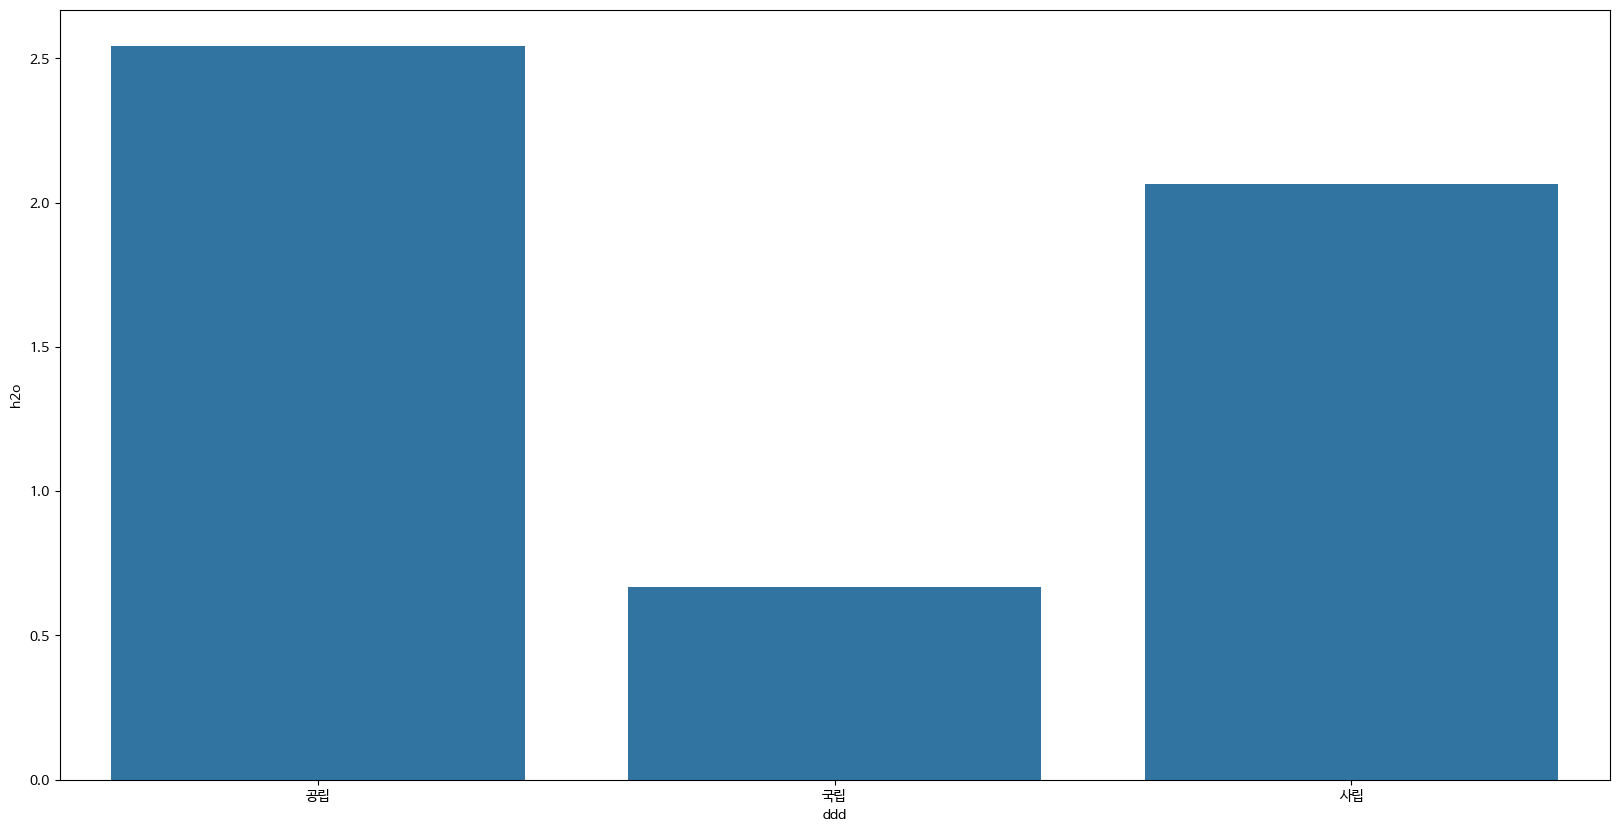

In [39]:
new_data = data.groupby('fdtn_sctn_dscnt')['qltwtr_poll_entrps_co'].mean().reset_index()

# Seaborn을 사용하여 시각화
sns.barplot(x='fdtn_sctn_dscnt', y='qltwtr_poll_entrps_co', data=new_data)
plt.xlabel('ddd')
plt.ylabel('h2o')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

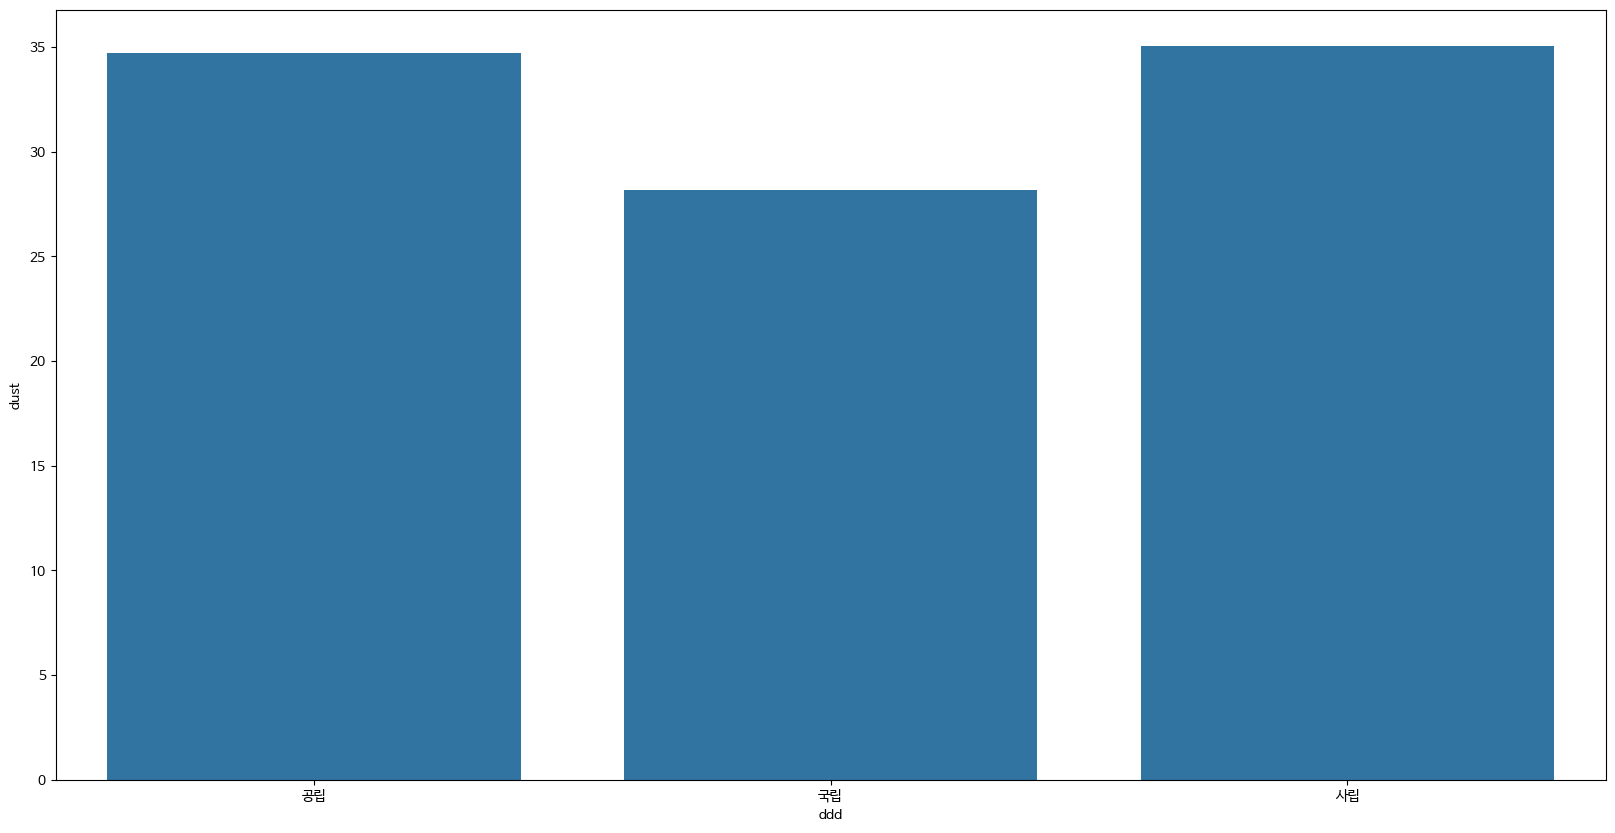

In [40]:
new_data = data.groupby('fdtn_sctn_dscnt')['ave_fnds'].mean().reset_index()

# Seaborn을 사용하여 시각화
sns.barplot(x='fdtn_sctn_dscnt', y='ave_fnds', data=new_data)
plt.xlabel('ddd')
plt.ylabel('dust')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

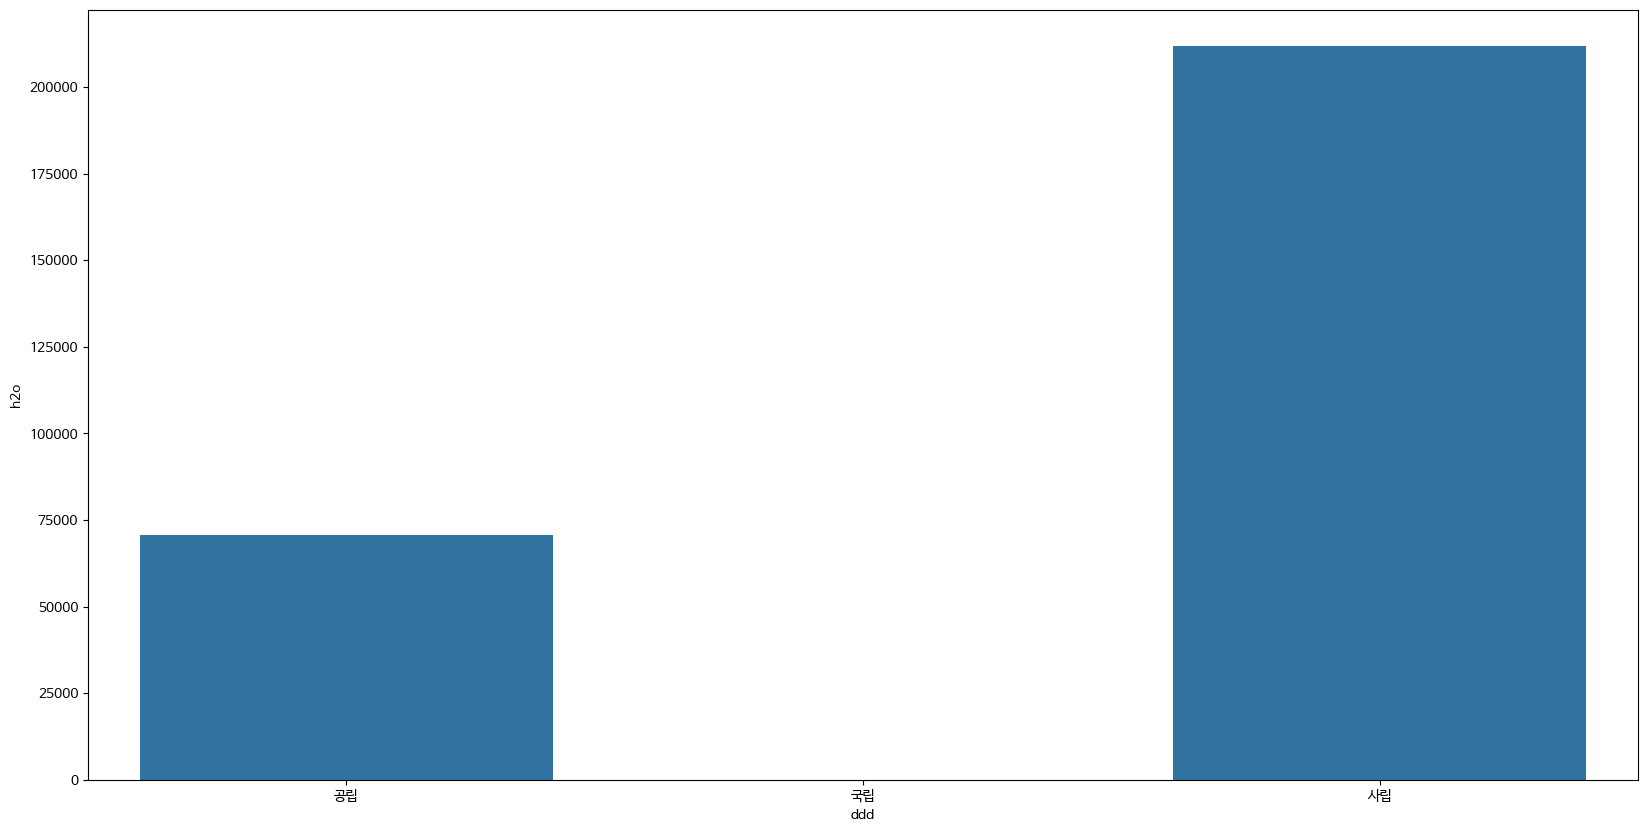

In [41]:
new_data = data.groupby('fdtn_sctn_dscnt')['qltwtr_poll_entrps_co'].sum().reset_index()

# Seaborn을 사용하여 시각화
sns.barplot(x='fdtn_sctn_dscnt', y='qltwtr_poll_entrps_co', data=new_data)
plt.xlabel('ddd')
plt.ylabel('h2o')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [43]:
new_data = data.groupby('fdtn_sctn_dscnt')['qltwtr_poll_entrps_co'].count().reset_index()


In [44]:
new_data.head()

,fdtn_sctn_dscnt,qltwtr_poll_entrps_co
0,공립,27757
1,국립,3
2,사립,102525
